In [16]:
import numpy as np
import matplotlib.pyplot as plt
from Code.toolbox import compare_freq


In [17]:
# Noise
# 1. low-freq normal noise
# 2. nk2 normal noise
# 3. laplace noise
# 4. real data

# filter
# 1. fft_denoise
# 2. Savgol Filters + new method
# 3. Wiener Filters
# 4. Matched Filters
# 5. Notch Filters

In [18]:
from Code.Tutorial.Dataset import load_scg

def load_(path):
    data = np.load(path)
    signals, labels = data[:, :1000], data[:, 1000:]
    return signals, labels

signals_n_0, labels_n_0 = load_('../../Data/Normal/sim_5000_0_90_140_train_normal.npy')
signals_n_1, labels_n_1 = load_('../../Data/Normal/sim_5000_0.1_90_140_train_normal.npy')
signals_n_4, labels_n_4 = load_('../../Data/Normal/sim_5000_0.4_90_140_train_normal.npy')
signals_n_8, labels_n_8 = load_('../../Data/Normal/sim_5000_0.8_90_140_train_normal.npy')

signals_l_0, labels_l_0, duration, fs = load_scg(0, 'train')
signals_l_1, labels_l_1, _, _ = load_scg(0.1, 'train')
signals_l_8, labels_l_8, _, _ = load_scg(0.8, 'train')

### FFT Denoise

In [19]:
from Code.Tutorial.denoise_fft import fft_denoise

In [20]:
fft_denoise?

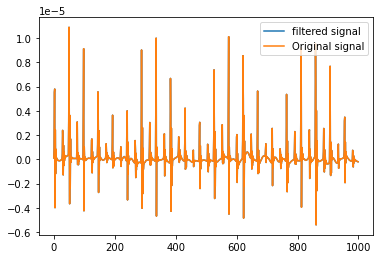

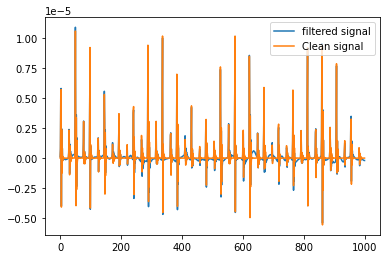

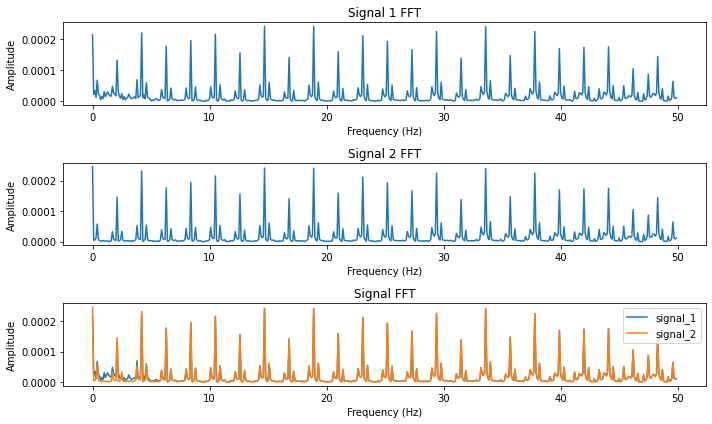

In [35]:
threhold = 0.00000 ** 2
idx = 0
ffted_signal_n_1 = fft_denoise(signals_n_1[idx], threhold)
plt.figure()
plt.plot(ffted_signal_n_1, label='filtered signal')
plt.plot(signals_n_1[idx], label='Original signal')
plt.legend()
plt.figure()
plt.plot(ffted_signal_n_1, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal')

plt.legend()

compare_freq(ffted_signal_n_1, signals_n_0[idx])

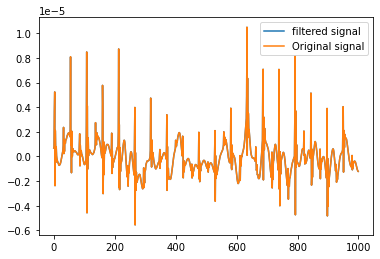

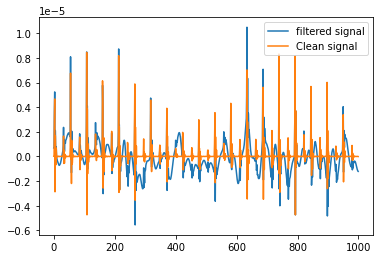

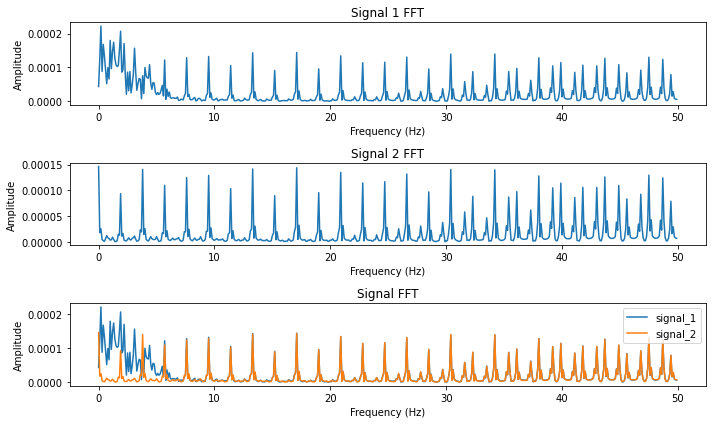

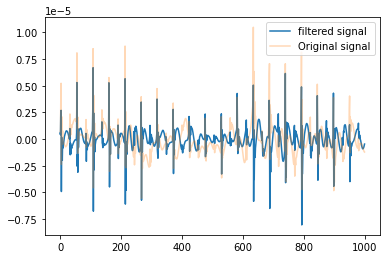

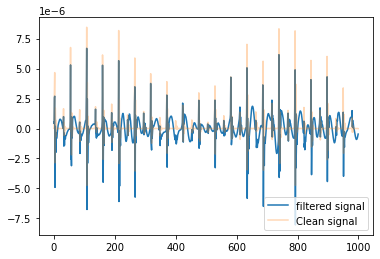

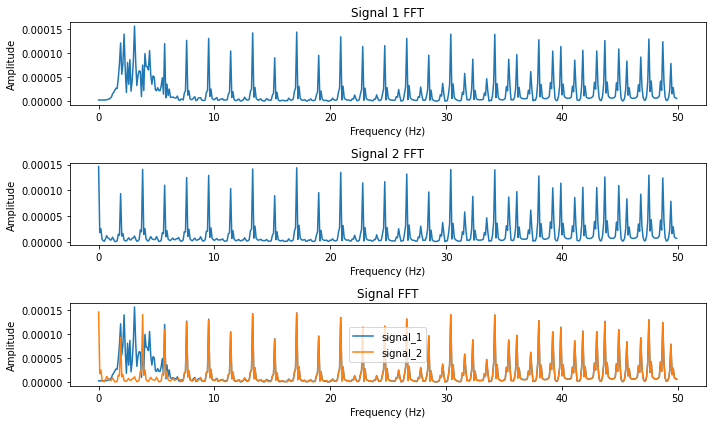

In [45]:
threhold = 0.00000 ** 2
idx = 21

ffted_signal_n_8 = fft_denoise(signals_n_8[idx], threhold)
plt.figure()
plt.plot(ffted_signal_n_8, label='filtered signal')
plt.plot(signals_n_8[idx], label='Original signal')
plt.legend()
plt.figure()
plt.plot(ffted_signal_n_8, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal')
plt.legend()

from Code.Tutorial.filter_butterworth import butter_highpass_filter,butter_bandstop_filter

compare_freq(ffted_signal_n_8, signals_n_0[idx])

highpass_signal_n_8 = butter_highpass_filter(ffted_signal_n_8, 2, fs)

plt.figure()
plt.plot(highpass_signal_n_8, label='filtered signal')
plt.plot(signals_n_8[idx], label='Original signal', alpha=0.3)
plt.legend()
plt.figure()
plt.plot(highpass_signal_n_8, label='filtered signal')
plt.plot(signals_n_0[idx], label='Clean signal', alpha=0.3)
plt.legend()

compare_freq(highpass_signal_n_8, signals_n_0[idx])


(1000,)


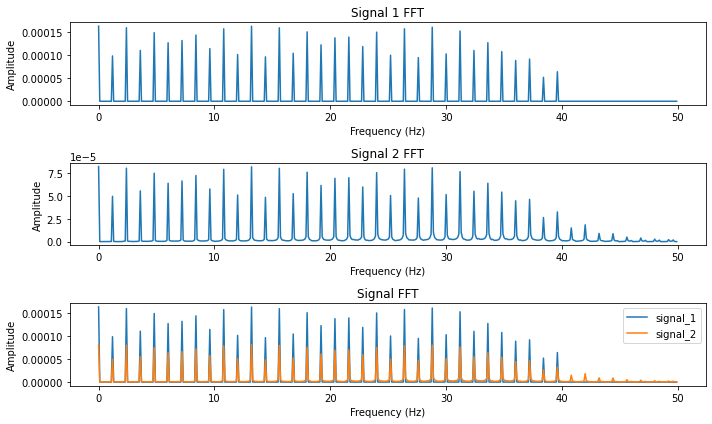

In [82]:
# plt.plot(signals_l_0[idx+100])
idx=0
t = np.linspace(0, 10, 1000)
print(t.shape)
signals_l_0_r = signals_l_0[idx+100] * (2 + np.sin(2 * np.pi * 0.4 * t))
# compare_freq(signals_l_0_r, signals_l_0[idx+100] )

ffted_signals_l_0_r = fft_denoise(signals_l_0_r, 0.000000000002)
# compare_freq(signals_l_0_r, ffted_signals_l_0_r )
compare_freq(ffted_signals_l_0_r, signals_l_0[idx+100] )
# ffted_signals_l_0_r

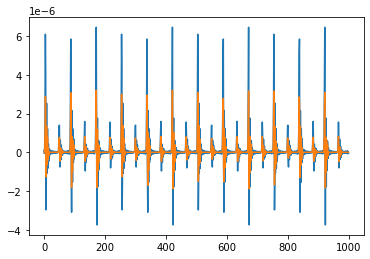

In [83]:
plt.plot(ffted_signals_l_0_r)
plt.plot(signals_l_0[idx+100] )

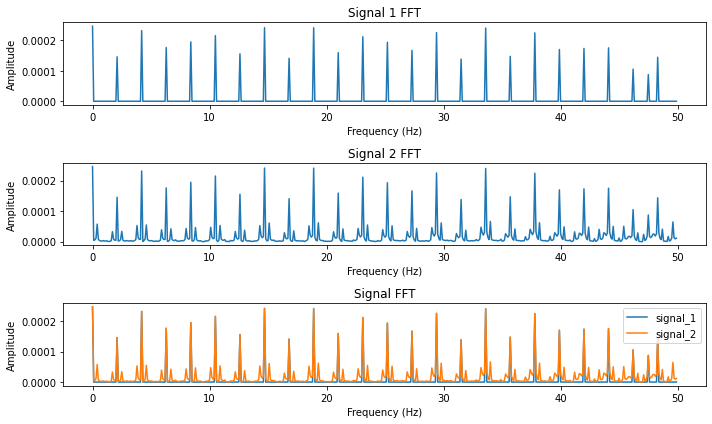

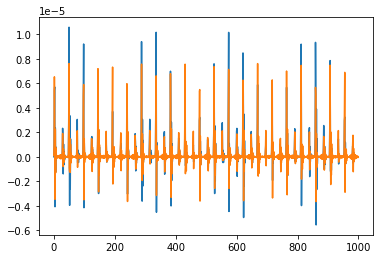

In [95]:

ffted_signals_n_0_r = fft_denoise(signals_n_0[0], 0.000000000005)
compare_freq(ffted_signals_n_0_r, signals_n_0[0] )
plt.plot(signals_n_0[0])
plt.plot(ffted_signals_n_0_r)